In [1]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [2]:
pip install seed

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Kütüphaneleri içe aktarma
import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
import numpy as np
np.random.seed(1)
rn.seed(3)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import SimpleRNN
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

# Veri Kümesi Ön İşleme ve Özellikleri

In [4]:
df = pd.read_csv("household_daily.csv",header=0,infer_datetime_format=True)
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


# # Tarih Saat Sütunlarını Yeniden Biçimlendirelim

In [5]:
# Yılın Ayı, Günü, Saati vb. Gibi Tüm Verileri Çıkartıyoruz

df["Ay"] = pd.to_datetime(df["datetime"]).dt.month
df["Yil"] = pd.to_datetime(df["datetime"]).dt.year
df["Tarih"] = pd.to_datetime(df["datetime"]).dt.date
df["Saat"] = pd.to_datetime(df["datetime"]).dt.time
df["Hafta"] = pd.to_datetime(df["datetime"]).dt.week
df["Gün"] = pd.to_datetime(df["datetime"]).dt.day_name()
df = df.set_index("datetime")
df.index = pd.to_datetime(df.index)
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Ay,Yil,Tarih,Saat,Hafta,Gün
datetime,,,,,,,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319,12,2006,2006-12-16,00:00:00,50,Saturday
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732,12,2006,2006-12-17,00:00:00,50,Sunday
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281,12,2006,2006-12-18,00:00:00,51,Monday
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043,12,2006,2006-12-19,00:00:00,51,Tuesday
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011,12,2006,2006-12-20,00:00:00,51,Wednesday


# # Global_active_power'ın Grafikleri

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

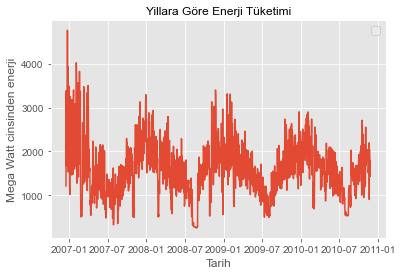

In [6]:
import seaborn as sns
#Çizgi Grafiği
sns.lineplot(x=df["Tarih"], y=df["Global_active_power"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.legend()
plt.title("Yillara Göre Enerji Tüketimi")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

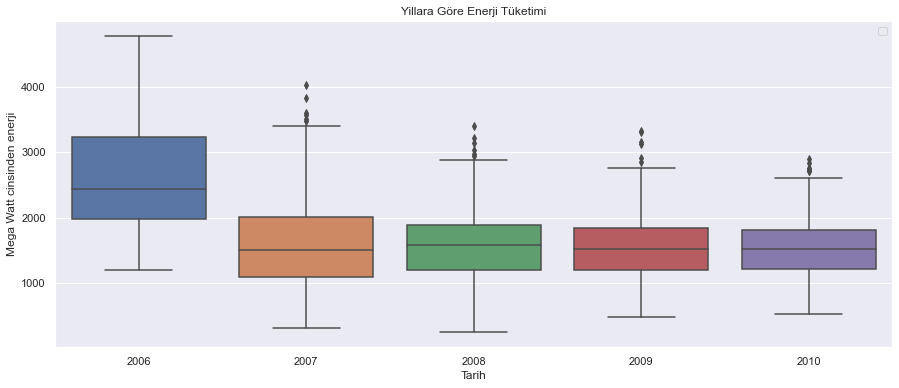

In [7]:
#Kutu Grafiği
sns.boxplot(x=df["Yil"], y=df["Global_active_power"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.legend()
plt.title("Yillara Göre Enerji Tüketimi")

Text(0.5, 1.0, 'Enerji Dağılımı')

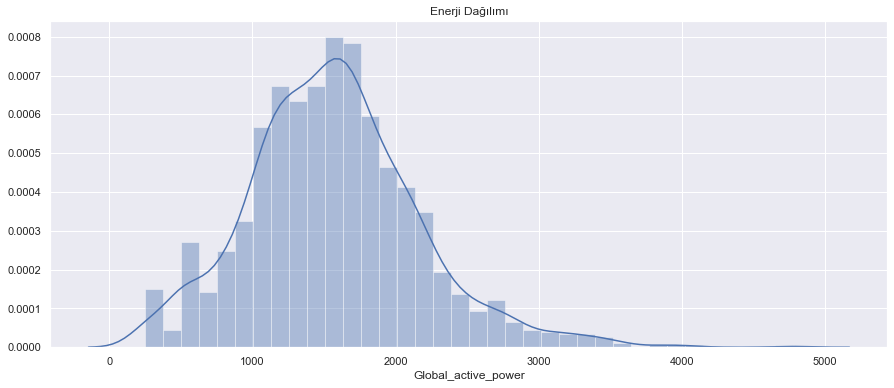

In [8]:
#Histogram Grafiği
sns.distplot(df["Global_active_power"])
plt.title("Enerji Dağılımı")

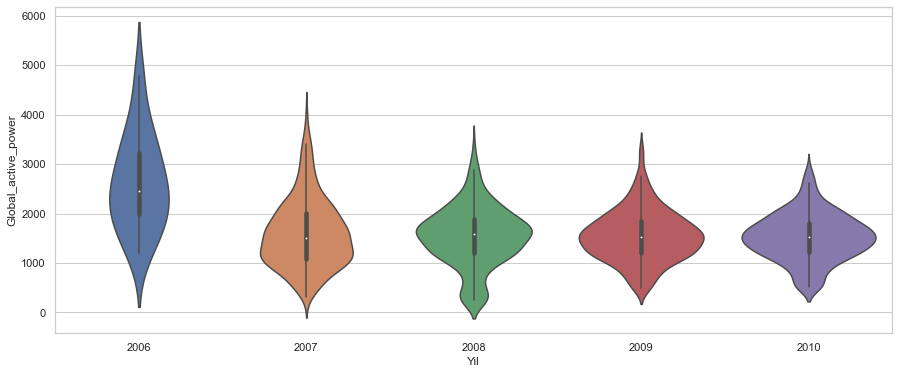

In [9]:
#Violin(keman) Grafiği
sns.set_style('whitegrid')
sns.violinplot(x = 'Yil', y = 'Global_active_power', data = df)

## Global_reactive_power'ın Grafikleri

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

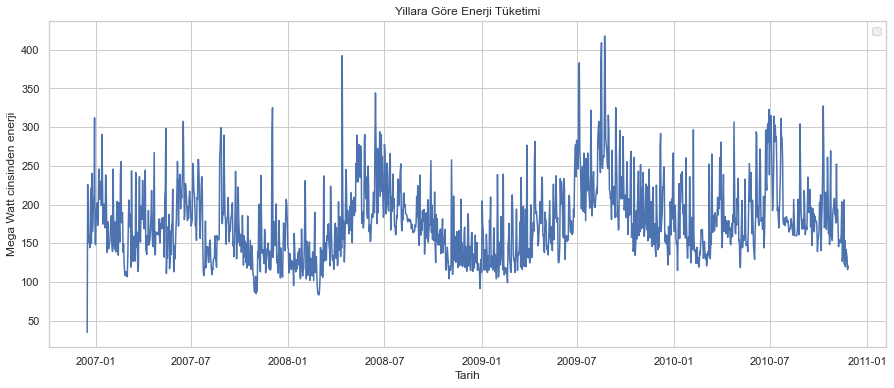

In [10]:
#Çizgi Grafiği
sns.lineplot(x=df["Tarih"], y=df["Global_reactive_power"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.legend()
plt.title("Yillara Göre Enerji Tüketimi")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

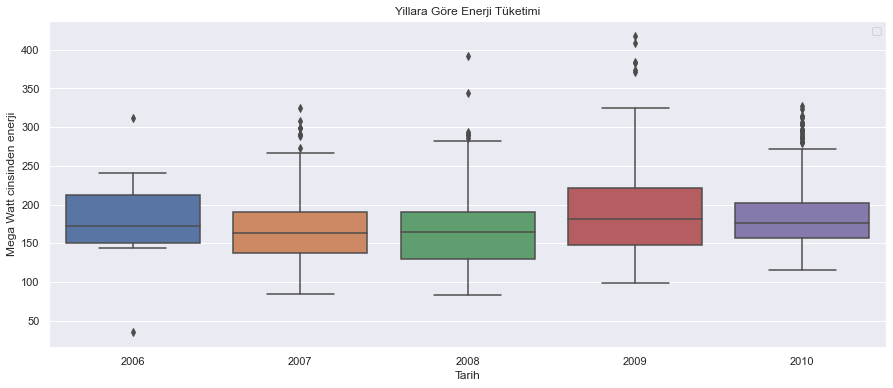

In [11]:
#Kutu Grafiği
sns.boxplot(x=df["Yil"], y=df["Global_reactive_power"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.legend()
plt.title("Yillara Göre Enerji Tüketimi")

Text(0.5, 1.0, 'Enerji Dağılımı')

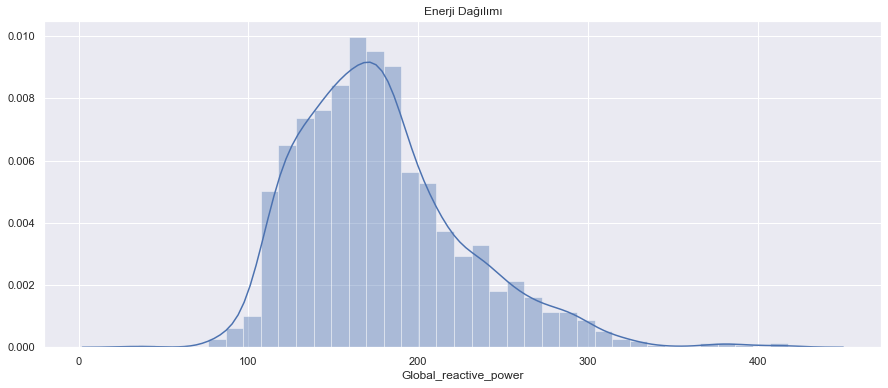

In [12]:
#Histogram Grafiği
sns.distplot(df["Global_reactive_power"])
plt.title("Enerji Dağılımı")

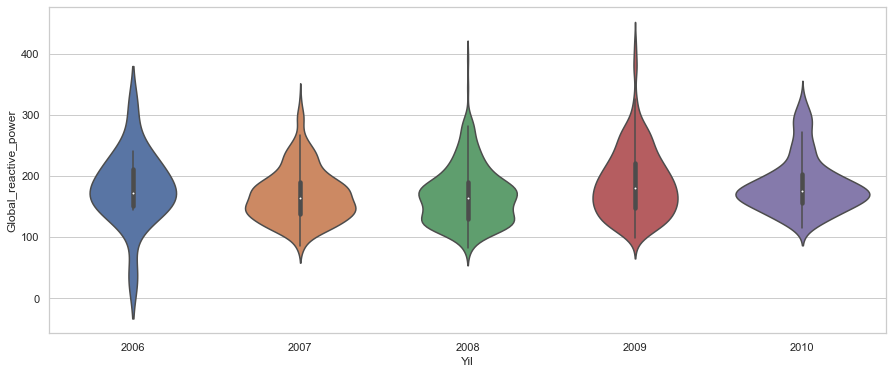

In [13]:
#Violin(keman) Grafiği
sns.set_style('whitegrid')
sns.violinplot(x = 'Yil', y = 'Global_reactive_power', data = df)

# Voltage'in Grafikleri

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

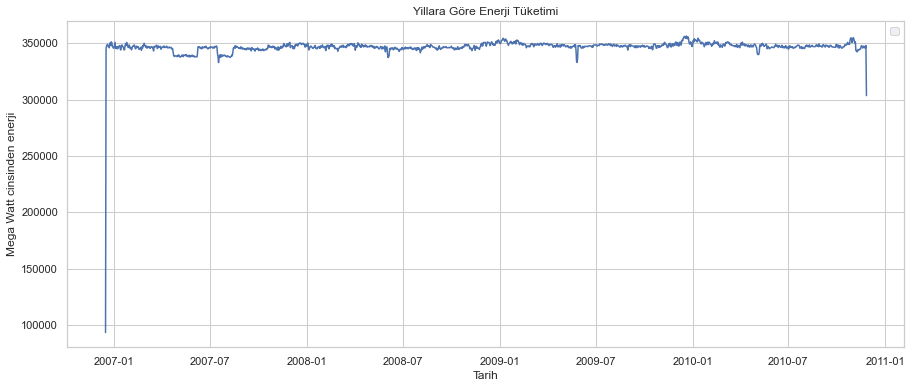

In [14]:
#Çizgi Grafiği
sns.lineplot(x=df["Tarih"], y=df["Voltage"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.legend()
plt.title("Yillara Göre Enerji Tüketimi")

Text(0.5, 1.0, 'Enerji Dağılımı')

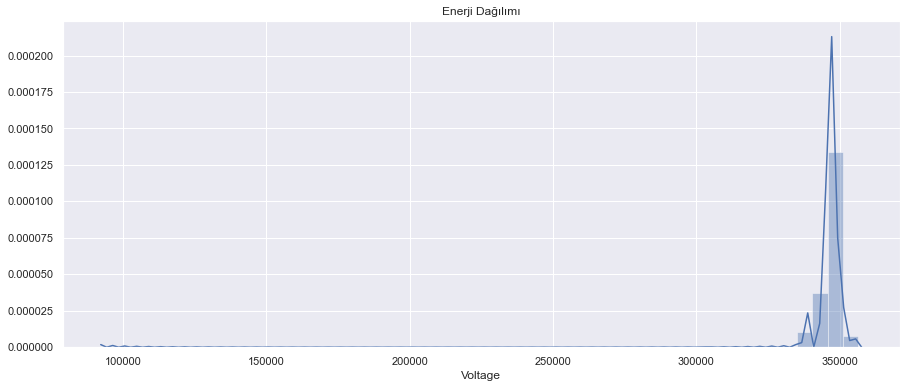

In [15]:
#Histogram Grafiği
sns.distplot(df["Voltage"])
plt.title("Enerji Dağılımı")

In [16]:
# Korelasyon matrisi
df.corr()['Global_active_power']

Global_active_power      1.000000
Global_reactive_power    0.042327
Voltage                  0.065265
Global_intensity         0.999181
Sub_metering_1           0.545054
Sub_metering_2           0.482796
Sub_metering_3           0.734302
Sub_metering_4           0.887348
Ay                      -0.087049
Yil                     -0.084846
Hafta                   -0.086835
Name: Global_active_power, dtype: float64

In [17]:
# Korelasyon matrisi
df.corr()['Global_reactive_power']

Global_active_power      0.042327
Global_reactive_power    1.000000
Voltage                  0.052400
Global_intensity         0.064038
Sub_metering_1           0.318793
Sub_metering_2           0.184432
Sub_metering_3           0.036932
Sub_metering_4          -0.099339
Ay                       0.084706
Yil                      0.157104
Hafta                    0.090896
Name: Global_reactive_power, dtype: float64

In [18]:
# Korelasyon matrisi
df.corr()['Voltage']

Global_active_power      0.065265
Global_reactive_power    0.052400
Voltage                  1.000000
Global_intensity         0.054957
Sub_metering_1          -0.003385
Sub_metering_2          -0.011267
Sub_metering_3           0.099149
Sub_metering_4           0.051747
Ay                      -0.054016
Yil                      0.208007
Hafta                   -0.051904
Name: Voltage, dtype: float64

In [19]:
print(df.describe().Global_active_power) 
df.drop(df[df['Global_active_power']==0].index, inplace = True)
#Hacim değeri 0 olan satırları düşürelim 

count    1442.000000
mean     1567.839069
std       597.306856
min       250.298000
25%      1176.195000
50%      1543.253000
75%      1894.467500
max      4773.386000
Name: Global_active_power, dtype: float64


In [20]:
print(df.describe().Global_reactive_power) 
df.drop(df[df['Global_reactive_power']==0].index, inplace = True)
#Hacim değeri 0 olan satırları düşürelim 

count    1442.000000
mean      178.004759
std        48.881691
min        34.922000
25%       143.063000
50%       171.199000
75%       202.548500
max       417.834000
Name: Global_reactive_power, dtype: float64


In [21]:
print(df.describe().Voltage) 
df.drop(df[df['Voltage']==0].index, inplace = True)
#Hacim değeri 0 olan satırları düşürelim 

count      1442.000000
mean     346600.529542
std        7375.850040
min       93552.530000
25%      345736.802500
50%      346979.430000
75%      348283.367500
max      356306.410000
Name: Voltage, dtype: float64


In [22]:
# Erken durdurma kurma
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

# JACKKNİFE BÖLÜMÜ

In [23]:
def jackknife(x, func, variance = False):
    N = len(x)
    pos = np.arange(N)
    values = [func(x[pos != i]) for i in pos]
    jack = np.sum(values)/N
    
    if variance:
        values = [np.power(func(x[pos != i]) - jack, 2.0) for i in pos]
        var = (N-1)/N * np.sum(values)
        return jack, var
    else:
        return jack

In [24]:
x = np.random.normal(0, 2, 100)
print(x.std())
jackknife(x, np.std, True)

1.77031242766317


(1.7701752552752565, 0.016423430647735153)

# BOOTSTRAPPİNG BÖLÜMÜ

In [25]:
def bootstrapping(x, n_samples, func=np.mean):
    y = x.copy()
    N = len(y)
    population = []
    
    for i in range(n_samples):
        population.append(func(np.random.choice(y, N, replace=True)))
        
    return np.array(population)

In [26]:
def histogram(values, n_bins=100):
    xmax = values.max()
    xmin = values.min()
    delta  = (xmax-xmin)/n_bins
    
    counts = np.zeros(n_bins+1, dtype='int')
    
    for value in values:
        val_bin = np.around((value-xmin)/delta).astype('int')
        counts[val_bin] += 1.0
    
    bins = xmin+delta*np.arange(n_bins+1)
    
    return bins, counts/values.shape[0]

In [27]:
x = np.random.normal(0, 2, size=100)

In [28]:
boot = bootstrapping(x, 1000)

In [29]:
x.mean()

0.30558955524039705

In [30]:
x.std()

1.8639896349099911

In [31]:
bins, counts = histogram(boot)

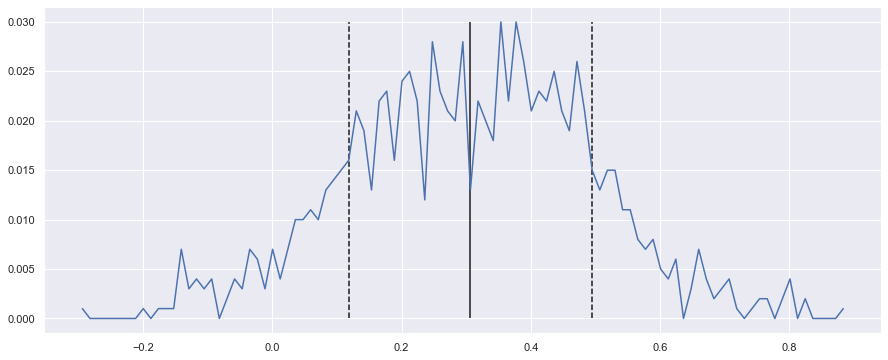

In [32]:
plt.plot(bins, counts)
plt.vlines(x=boot.mean(), ymin=0, ymax=counts.max(), label='mean')
plt.vlines(x=boot.mean()+boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--')
plt.vlines(x=boot.mean()-boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--')

In [33]:
# Modeli oluşturalım ve eğitelim.
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Eğitim verileri için döngü
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Val verileri için döngü
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Modele Katmanlar Ekleme
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
    model.add(SimpleRNN(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    
  
    # Verilerin eğitimi
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']
  

In [34]:
# Modeli değerlendirme
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Verileri test etmek için döngü
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Tahmin
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat
  

In [35]:
# Tahminleri çizmek
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'red')
    plt.plot(Y_hat,c = 'green')
    plt.xlabel('Gün')
    plt.ylabel('Enerji')
    plt.title("RNN Tahmin Modeli")
    plt.legend(['Gercek','Tahmin'],loc = 'lower right')
    plt.show()

In [36]:
# Eğitim hatalarının grafiğini çizme
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

# Model Oluşturma 

In [37]:
# Seriyi ekrana çıkarma
series = df[['Global_active_power','Global_reactive_power','Voltage']] # Özellikleri seçtik.3 Giriş.
print(series.shape)
print(series.tail())

(1442, 3)
            Global_active_power  Global_reactive_power    Voltage
datetime                                                         
2010-11-22             2041.536                142.354  345883.85
2010-11-23             1577.536                137.450  346428.76
2010-11-24             1796.248                132.460  345644.59
2010-11-25             1431.164                116.128  347812.21
2010-11-26             1488.104                120.826  303487.57


In [38]:
# Train,Val,Test Bölümü
train_start = dt.date(2006,12,16)
train_end = dt.date(2009,1,24)
train_data = series.loc[train_start:train_end]

val_start = dt.date(2009,1,25)
val_end = dt.date(2010,1,25)
val_data = series.loc[val_start:val_end]

test_start = dt.date(2010,1,26)
test_end = dt.date(2010,11,26)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(771, 3) (366, 3) (305, 3)


In [39]:
# Normalizasyon
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(771, 3) (366, 3) (305, 3)


In [40]:
#Hiperparametre ayarı
timesteps = 30 
hl = [50,45]
lr = 1e-3
batch_size = 64 
num_epochs = 200

In [41]:
#Bu işlem 5-10 dakika arası sürebilir.
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)

Epoch 00101: early stopping


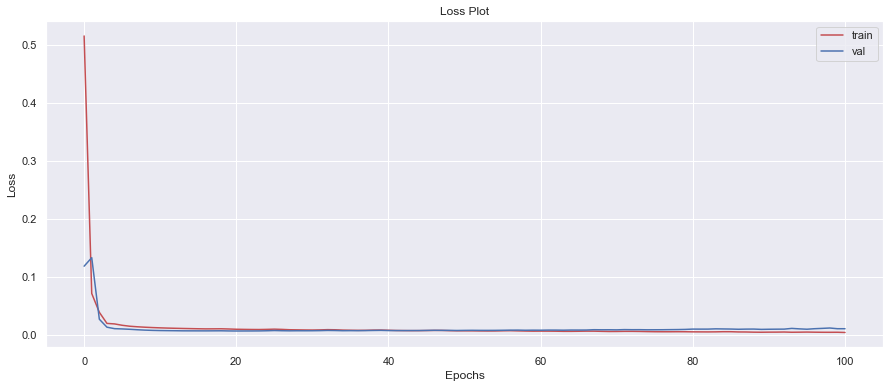

In [42]:
plot_error(train_error,val_error)

In [43]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,30)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

MSE = 0.008170942227135165
RMSE = 0.09039326427967498
R-Squared Score = 0.06842176421588086


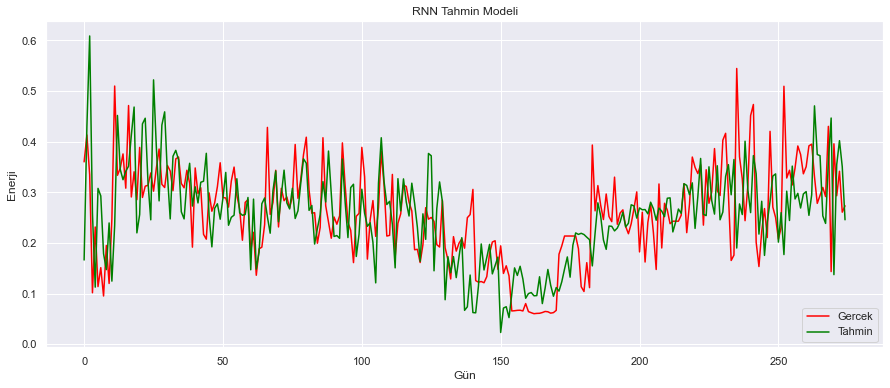

In [44]:
plot_data(true,predicted)

# K-FOLD ve GRİDSEARCH

In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [46]:
#Veri setmizi tekrar tanımlamamızdaki amaç altta x1 ve y1'i ayarlarken bir sorunla karşılaşmamak.
df = pd.read_csv('household_daily.csv')
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [47]:
x1 = df.iloc[:,1:3]
y1 = df.iloc[:,3:4]

In [48]:
x1

,Global_active_power,Global_reactive_power
0,1209.176,34.922
1,3390.460,226.006
2,2203.826,161.792
3,1666.194,150.942
4,2225.748,160.998
...,...,...
1437,2041.536,142.354
1438,1577.536,137.450
1439,1796.248,132.460
1440,1431.164,116.128


In [49]:
y1

,Voltage
0,93552.53
1,345725.32
2,347373.64
3,348479.01
4,348923.61
...,...
1437,345883.85
1438,346428.76
1439,345644.59
1440,347812.21


In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x1_np = x1.to_numpy()
y1_np = y1.to_numpy()
x1_np ,y1_np = make_classification( random_state=1, n_informative=10, n_redundant=10)

# Çapraz doğrulama prosedürünü yapılandıralım
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# Bölmeleri numaralandıralım
outer_results = list()
for train_ix, test_ix in cv_outer.split(x1_np):
	# Verileri bölelim
	X_train, X_test = x1_np[train_ix, :], x1_np[test_ix, :]
	y_train, y_test = y1_np[train_ix], y1_np[test_ix]
	# Çapraz doğrulama prosedürünü yapılandıralım
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# Modeli tanımlayalım
	model = RandomForestClassifier(random_state=1)
	# Arama alanını tanımlayalım
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	space['max_features'] = [2, 4, 6]
	# Aramayı tanımlayalım
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# aramayı yapalım
	result = search.fit(X_train, y_train)
	# Tüm eğitim setinde en iyi performans gösteren modeli elde edelim
	best_model = result.best_estimator_
	# Geciktirme veri kümesinde modeli değerlendirme
	yhat = best_model.predict(X_test)
	# Modeli değerlendirme
	acc = accuracy_score(y_test, yhat)
	# Sonucu saklayalım
	outer_results.append(acc)
	# İlerlemeleri ekrana yazdıralım
	print('acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# Modelin tahmini performansını gösterelim
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

acc=0.900, est=0.867, cfg={'max_features': 6, 'n_estimators': 100}
acc=0.900, est=0.867, cfg={'max_features': 2, 'n_estimators': 500}
acc=0.900, est=0.867, cfg={'max_features': 4, 'n_estimators': 500}
acc=0.800, est=0.833, cfg={'max_features': 4, 'n_estimators': 100}
acc=0.900, est=0.867, cfg={'max_features': 6, 'n_estimators': 100}
acc=0.900, est=0.856, cfg={'max_features': 2, 'n_estimators': 100}
acc=0.800, est=0.911, cfg={'max_features': 2, 'n_estimators': 100}
acc=0.800, est=0.856, cfg={'max_features': 2, 'n_estimators': 100}
acc=0.900, est=0.878, cfg={'max_features': 6, 'n_estimators': 100}
acc=0.900, est=0.900, cfg={'max_features': 6, 'n_estimators': 100}
Accuracy: 0.870 (0.046)
